NameError: name 'p' is not defined

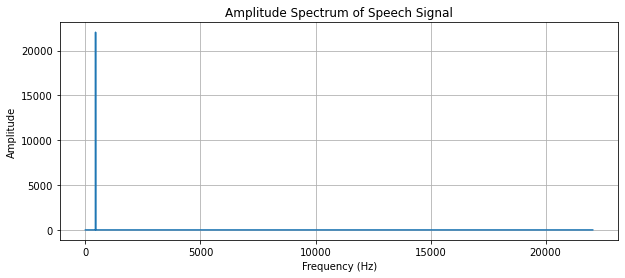

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample speech signal (you would load your actual speech signal here)
# For demonstration purposes, let's create a simple sinusoidal signal
sample_rate = 44100  # Sample rate in Hz
duration = 1  # Duration of the signal in seconds
frequency = 440  # Frequency of the signal in Hz (A4 note)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
speech_signal = np.sin(2 * np.pi * frequency * t)

# Compute the FFT (Fast Fourier Transform) to transform the speech signal into frequency domain
speech_spectrum = np.fft.fft(speech_signal)

# Calculate the amplitude spectrum
amplitude_spectrum = np.abs(speech_spectrum)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 4))
frequencies = np.fft.fftfreq(len(amplitude_spectrum), d=1/sample_rate)  # Frequency bins
plt.plot(frequencies[:len(frequencies)//2], amplitude_spectrum[:len(frequencies)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum of Speech Signal')
plt.grid(True)
p